In [220]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
import seaborn as sn

from sklearn import preprocessing

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import scipy
import scipy.signal
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
import numpy as np

In [1]:
# So we have:
# 1176 elements of A -> 1542 elements of B

In [104]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2, 4),
      nn.ReLU(),
      nn.Linear(4, 3)
    )

  def forward(self, x):
    return self.layers(x)

In [105]:
model = Model()

loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [106]:
model.double()

Model(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=3, bias=True)
  )
)

In [107]:
# X [3, 2] -> Y [3, 3], W [2, 3]
# X*W = Y
X = np.array([[2.0, 1.0], [6.0, 9.0], [5.1, 4.3]])
W = np.array([[4.5, 1.7, 1.1], [0.3, -4.3, -10.1]])
Y = np.dot(X, W)

In [108]:
Y

array([[  9.3 ,  -0.9 ,  -7.9 ],
       [ 29.7 , -28.5 , -84.3 ],
       [ 24.24,  -9.82, -37.82]])

In [109]:
X = torch.tensor(X)
Y = torch.tensor(Y)

In [110]:
for epoch in range(0, 500 + 1):
    # Zero the gradients
    optimizer.zero_grad()

    # Perform forward pass
    outputs = model(X)

    # Compute loss
    loss = loss_function(outputs, Y)

    # Perform backward pass
    loss.backward()

    # Perform optimization
    optimizer.step()
    if(not epoch % 50):
        print(f"Epoch {epoch}, loss {loss}")

# Process is complete.
print('Training process has finished.')

Epoch 0, loss 26.72825252787903
Epoch 50, loss 19.870263376852662
Epoch 100, loss 9.164542224126293
Epoch 150, loss 5.5297477042997
Epoch 200, loss 4.755276452668417
Epoch 250, loss 3.8961850321815055
Epoch 300, loss 3.0963431099660395
Epoch 350, loss 2.254371729548351
Epoch 400, loss 2.1281716854209187
Epoch 450, loss 1.9890461279396783
Epoch 500, loss 1.8323878297834426
Training process has finished.


# EEG

In [110]:
A = np.loadtxt("./Data/A.csv", delimiter = ',')
B = np.loadtxt("./Data/B.csv", delimiter = ',')

In [5]:
Res = np.loadtxt("./Data/Res.csv", delimiter = ',')
X = np.loadtxt("./Data/X.csv", delimiter = ',')

In [6]:
X.shape

(1176, 1542)

In [9]:
B.shape

(990, 1542)

In [10]:
A.shape

(990, 1176)

In [11]:
Res = np.dot(A, X)

In [34]:
loss_function(torch.tensor(Res), torch.tensor(B))

/tmp/ipykernel_4681/2070541639.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss_function(torch.tensor(Res), torch.tensor(B))


tensor(8.8543e-24, dtype=torch.float64)

In [30]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(1176, 2500),
      nn.ReLU(),
      nn.Linear(2500, 1542)
    )


  def forward(self, x):
    return self.layers(x)

In [18]:
1176 * 4000 + 4000 * 1542

10872000

In [24]:
A = torch.tensor(A)
B = torch.tensor(B)

In [20]:
B.shape

(990, 1542)

In [31]:
model = Model()

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [32]:
model.double()

Model(
  (layers): Sequential(
    (0): Linear(in_features=1176, out_features=2500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2500, out_features=1542, bias=True)
  )
)

In [33]:
for epoch in range(0, 10000 + 1):
    optimizer.zero_grad()
    outputs = model(A)
    loss = loss_function(outputs, B)
    loss.backward()
    optimizer.step()
    
    if(not epoch % 100):
        print(f"Epoch {epoch}, loss {loss}")

Epoch 0, loss 9.362279443895677
Epoch 100, loss 4.927960553670818
Epoch 200, loss 3.138518022034301
Epoch 300, loss 2.1004181271793367
Epoch 400, loss 1.516866844681563
Epoch 500, loss 1.1689371130914248
Epoch 600, loss 0.9236573992684317
Epoch 700, loss 0.7426457897099351
Epoch 800, loss 0.6499463351276045
Epoch 900, loss 0.5168326915582304
Epoch 1000, loss 0.45640235841283106
Epoch 1100, loss 0.40180792451559894
Epoch 1200, loss 0.3420620232647726
Epoch 1300, loss 0.31390838333711407
Epoch 1400, loss 0.2702958324552512
Epoch 1500, loss 0.24232951474056874
Epoch 1600, loss 0.24032053506822265
Epoch 1700, loss 0.20091217881489626
Epoch 1800, loss 0.1780837438702175
Epoch 1900, loss 0.16971216888284232
Epoch 2000, loss 0.18095471861531237
Epoch 2100, loss 0.13566951800434102
Epoch 2200, loss 0.1287308885028234
Epoch 2300, loss 0.12317023162961095
Epoch 2400, loss 0.12967848210223232
Epoch 2500, loss 0.108165299878448
Epoch 2600, loss 0.10693630874904804
Epoch 2700, loss 0.10226568865196

In [143]:
#MSE 0.88

In [ ]:
#ADD BATCH NORM

# Testing

In [10]:
FRAME_SIZE = 512
SR = 22050
HOP_LENGTH = 118

In [12]:
B = model(torch.tensor(A)).detach().numpy()

/tmp/ipykernel_3665/2732087955.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  B = model(torch.tensor(A)).detach().numpy()


In [13]:
def restore(D, frame_size = FRAME_SIZE, hop_length = HOP_LENGTH, epochs=10, window='hann'):
    
    D = np.concatenate((np.zeros((D.shape[0], 1)), D, np.zeros((D.shape[0], 1))), axis=1)
    mag, _ = librosa.magphase(D)
    
    phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=mag.shape))
    x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, window=window)
    
    for i in range(epochs):
        _, phase = librosa.magphase(librosa.stft(x_, n_fft=frame_size, hop_length=hop_length, center=False,
                                                 window=window))
        x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, window=window)
        
    return x_[hop_length:-hop_length]

In [14]:
x = restore(B.reshape(-1, 6, 257).reshape(-1, 257).T)

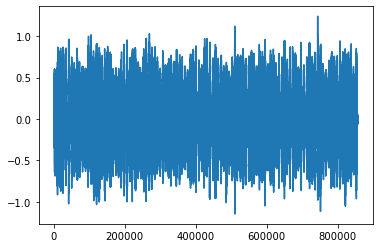

In [15]:
plt.plot(x)

In [16]:
scipy.io.wavfile.write('./230.wav', SR, x)

In [109]:
B.shape

(990, 1542)

In [ ]:
# 990, 257*6 -> 257, 990*6

In [102]:
B = model(A).detach().numpy()

In [103]:
B1 = B[:, 257*0:257*1]
B2 = B[:, 257*1:257*2]
B3 = B[:, 257*2:257*3]
B4 = B[:, 257*3:257*4]
B5 = B[:, 257*4:257*5]
B6 = B[:, 257*5:257*6]

In [104]:
B1.shape

(990, 257)

In [105]:
to_sound = np.concatenate((B1, B2, B3, B4, B5, B6), axis = 0).T

In [106]:
to_sound.shape

(257, 5940)

In [107]:
x = restore(to_sound.reshape(257, -1))

In [108]:
scipy.io.wavfile.write('./229.wav', SR, x)

In [122]:
torch.save(model.state_dict(), "./models/model1")

# smth

In [124]:
A = np.loadtxt('./Data/bash.csv', delimiter=';', ndmin=2)
label = A[:, 0]
A = A[:, 1:]
A.shape

(25586, 1176)

In [126]:
label = label.astype(int)

In [199]:
def get_nearest(label, ind):
    while label[ind] != 0:
        ind += 1
    return ind - 1

restricted_mode = False 
rest_num = 1
rest_arr = np.zeros(10)
indices1 = np.empty(0)
indices2 = np.empty(0)
hops = 18 # zeroes
flag = 0 # in block 
count = 0

for i, val in enumerate(label):
    if val == 0:
        if flag:
            count += 1
            continue
        else:
            continue
    
    if val > 10:
        if restricted_mode & (rest_arr[int(val) % 10] == rest_num):
            continue
        count = 0
        flag = 1
        last_ind = i
    else:
        if count != hops:
            count = 0
            continue
        else: 
            count = 0
            flag = 0
            if restricted_mode:
                rest_arr[int(val) % 10] += 1
            indices1 = np.append(indices1, last_ind)
            indices2 = np.append(indices2, get_nearest(label, i))
            
#indices1 = np.array(sorted(list(set(indices1).union(*[set(indices1 + j) for j in range(1, 13)]))))
#indices2 = np.array(sorted(list(set(indices2).union(*[set(indices2 + j) for j in range(1, 13)]))))
#inds = np.array(sorted(list(set(indices1).union(indices2)))).astype(int)
inds = indices1.astype(int) + 2
inds = np.array(sorted(list(set(inds).union(*[set(inds + j) for j in range(1, 9 + 2)]))))
label[inds].shape
#[print(i) for i in zip(indices1, indices2)]

(1210,)

In [200]:
inds

array([  343,   344,   345, ..., 24383, 24384, 24385])

In [201]:
data = A[inds]
data.shape

(1210, 1176)

In [202]:
np.savetxt("./Data/A2.csv", data, delimiter=",")

In [203]:
names = ['Ba.wav', 'fa.wav', 'Ga.wav', 'Ma.wav', 'Ra.wav', 'Bu.wav', 'Ru.wav', 'mu.wav', 'fu.wav', 'Gu.wav']
path = './Audios/slogi/'
SR = 22050

Sounds = []
for name in names:
    Sounds.append(librosa.load(path + name, sr=SR)[0])
    
Snd = np.empty((0, 6766))
Snd = np.append(Snd, Sounds[0][3000:9766].reshape(1, -1), axis=0)
Snd = np.append(Snd, Sounds[1][1000:7766].reshape(1, -1), axis=0)
Snd = np.append(Snd, Sounds[2][4000:10766].reshape(1, -1), axis=0)
Snd = np.append(Snd, Sounds[3][:6766].reshape(1, -1), axis=0)
tmp = Sounds[4][:-1]
tmp = np.pad(tmp, ((6766 - tmp.shape[0]) // 2,
                           (6766 - tmp.shape[0]) // 2), 'constant', constant_values=(0, 0))
Snd = np.append(Snd, tmp.reshape(1, -1), axis=0)
Snd = np.append(Snd, Sounds[5][2200:8966].reshape(1, -1), axis=0)
Snd = np.append(Snd, Sounds[6][-6766:].reshape(1, -1), axis=0)
Snd = np.append(Snd, Sounds[7][250:7016].reshape(1, -1), axis=0)
Snd = np.append(Snd, Sounds[8][2000:8766].reshape(1, -1), axis=0)
Snd = np.append(Snd, Sounds[9][1300:8066].reshape(1, -1), axis=0)

Snd = np.concatenate((Snd[-1].reshape(1, -1), Snd[:-1, :]))
sounds = np.empty((0, 6766))
for sound in Snd.reshape(10, -1):
    sounds = np.append(sounds, np.zeros((5, 6766)))
    sounds = np.append(sounds, sound.reshape(1, -1))
    
spec = np.empty((257, 0))
for snd in Snd.reshape(10, -1):
    x = np.abs(librosa.stft(snd, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False))
    spec = np.append(spec, x, axis=1)
spec.shape

(257, 540)

In [204]:
B = np.empty((0, 257*6))
localspecs = spec.T.reshape(10, 54, 257).reshape(10, 54*257)

for l in label[(inds - 2)[::11]].astype(int):
    B = np.append(B, np.zeros((1, 257*6)), axis=0)
    B = np.append(B, localspecs[l % 10].reshape(54, 257).reshape(9, 6*257), axis=0)
    B = np.append(B, np.zeros((1, 257*6)), axis=0)

B.shape

(1210, 1542)

In [205]:
np.savetxt("./Data/B2.csv", B, delimiter=",")

# V2

In [3]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(1176, 4000),
      nn.ReLU(),
      nn.Linear(4000, 1542)
    )


  def forward(self, x):
    return self.layers(x)

In [4]:
model = Model()

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [5]:
model.double()

Model(
  (layers): Sequential(
    (0): Linear(in_features=1176, out_features=4000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4000, out_features=1542, bias=True)
  )
)

In [6]:
A = torch.tensor(np.loadtxt("./Data/A2.csv", delimiter = ','))
B = torch.tensor(np.loadtxt("./Data/B2.csv", delimiter = ','))

In [7]:
B.shape

torch.Size([1210, 1542])

In [8]:
for epoch in range(0, 7500 + 1):
    optimizer.zero_grad()
    outputs = model(A)
    loss = loss_function(outputs, B)
    loss.backward()
    optimizer.step()
    
    if(not epoch % 100):
        print(f"Epoch {epoch}, loss {loss}")

Epoch 0, loss 7.678527294463538
Epoch 100, loss 4.122311881631228
Epoch 200, loss 2.538675994804448
Epoch 300, loss 1.678898584901107
Epoch 400, loss 1.2376362001799208
Epoch 500, loss 0.9257669377219383
Epoch 600, loss 0.7203402008799785
Epoch 700, loss 0.6254669552753712
Epoch 800, loss 0.5156996275305951
Epoch 900, loss 0.4314012753276828
Epoch 1000, loss 0.3698071385904647
Epoch 1100, loss 0.3129050020980329
Epoch 1200, loss 0.28312853964997153
Epoch 1300, loss 0.26303212448082686
Epoch 1400, loss 0.2187985414467747
Epoch 1500, loss 0.1938863784551508
Epoch 1600, loss 0.18120874574857027
Epoch 1700, loss 0.16613919222523577
Epoch 1800, loss 0.1467976819584712
Epoch 1900, loss 0.1427881979489743
Epoch 2000, loss 0.12714711365416762
Epoch 2100, loss 0.10739749337520932
Epoch 2200, loss 0.13181330340541939
Epoch 2300, loss 0.09572447852103676
Epoch 2400, loss 0.11011644092824971
Epoch 2500, loss 0.09307426453630022
Epoch 2600, loss 0.09846570175876873
Epoch 2700, loss 0.07057530511625

In [9]:
torch.save(model.state_dict(), "./models/model2")

In [ ]:
for i in range(len(image)):
    for j in range(len(image)):
        newimage = image[len(image) - i][j]

# Anomalies

In [180]:
A = np.loadtxt("./Data/A2.csv", delimiter = ',')
B = np.loadtxt("./Data/B2.csv", delimiter = ',')

In [70]:
data = np.array([row for row in A])
covMatrix = np.cov(data,bias=True)

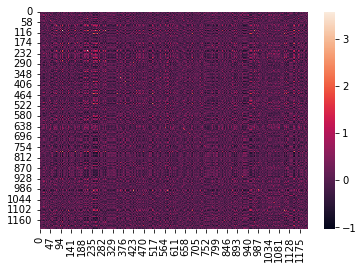

In [71]:
sn.heatmap(covMatrix)
plt.show()

In [16]:
#No normal distribution

In [19]:
B

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.19481165e-03, 1.60628206e-02, 1.45693023e-02, ...,
        5.12246918e-05, 1.38091249e-04, 7.96444393e-06],
       [3.08862091e+00, 1.83506106e+00, 3.92615975e-01, ...,
        1.13273335e-03, 2.63593224e-04, 9.17753264e-05],
       ...,
       [2.66149886e-02, 8.40976913e-02, 1.76148100e-01, ...,
        1.00069256e-04, 4.73050470e-05, 1.21025529e-04],
       [1.09793177e-02, 1.42348413e-01, 3.97277296e-01, ...,
        1.44139380e-04, 4.36392786e-05, 5.35283167e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [181]:
labels = np.array([(not np.any(B[i])) for i in range(A.shape[0])]).astype(int)

In [182]:
labels

array([1, 0, 0, ..., 0, 0, 1])

In [183]:
labels[198]

1

In [184]:
A1 = np.array([A[i] for i in range(len(labels)) if labels[i]==1])

In [185]:
A1.shape

(220, 1176)

In [186]:
A2 = np.array([A[i] for i in range(300) if labels[i]==0])

In [187]:
A2.shape

(245, 1176)

In [188]:
X_train = np.concatenate((A1, A2))

In [189]:
X_train.shape

(465, 1176)

In [190]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [191]:
X_train = scaler.transform(X_train)
labels_train = np.array([1]*220 + [0]*245).reshape(-1)

In [192]:
X_train.shape

(465, 1176)

In [259]:
rng = np.random.RandomState(42)

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x7F0C2BC1E740)

In [260]:
clf.predict(A[900:1100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [195]:
np.sum((clf.predict(A[900:1100]) + 1) // 2 == labels[900:1100]) / 200

0.185

In [256]:
clf = OneClassSVM(gamma='auto').fit(X_train)
clf.predict(A[900:1100])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [257]:
np.sum((clf.predict(A[900:1100]) + 1) // 2 == labels[900:1100]) / 200

0.21

In [198]:
X_train.shape

(465, 1176)

In [253]:
clf = RandomForestClassifier(max_depth = 15, random_state=0)
clf.fit(X_train, labels_train)

RandomForestClassifier(max_depth=15, random_state=0)

In [254]:
clf.predict(A[900:1100])

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1])

In [255]:
np.sum(clf.predict(A[1000:2000]) == labels[1000:2000]) / 1000

0.132

In [201]:
np.sum(clf.predict(A[900:1100]) == labels[900:1100]) / 200

0.64

In [250]:
clf = LogisticRegression()
clf.fit(X_train, labels_train)
clf.predict(A[900:1100])

/home/geodezik/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [251]:
np.sum(clf.predict(A[900:1100]) == labels[900:1100]) / 200

0.68

In [252]:
np.sum(clf.predict(A[1000:2000]) == labels[1000:2000]) / 1000

0.143

In [247]:
clf = GaussianNB()
clf.fit(X_train, labels_train)
clf.predict(A[900:1100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [248]:
np.sum(clf.predict(A[900:1100]) == labels[900:1100]) / 200

0.185

In [249]:
np.sum(clf.predict(A[1000:2000]) == labels[1000:2000]) / 1000

0.039

In [244]:
clf = SGDClassifier(loss = "modified_huber")
clf.fit(X_train, labels_train)
clf.predict(A[900:1100])

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

In [245]:
np.sum(clf.predict(A[900:1100]) == labels[900:1100]) / 200

0.625

In [246]:
np.sum(clf.predict(A[1000:2000]) == labels[1000:2000]) / 1000

0.134

In [241]:
clf = KNeighborsClassifier(n_neighbors = 25)
clf.fit(X_train, labels_train)
clf.predict(A[900:1100])

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

In [242]:
np.sum(clf.predict(A[900:1100]) == labels[900:1100]) / 200

0.475

In [243]:
np.sum(clf.predict(A[1000:2000]) == labels[1000:2000]) / 1000

0.091

In [218]:
clf = DecisionTreeClassifier()
clf.fit(X_train, labels_train)
clf.predict(A[900:1100])

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1])

In [219]:
np.sum(clf.predict(A[900:1100]) == labels[900:1100]) / 200

0.315

In [237]:
clf = SVC(kernel = "linear", C = 0.025, random_state = 101)
clf.fit(X_train, labels_train)
clf.predict(A[900:1100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1])

In [239]:
np.sum(clf.predict(A[1000:2000]) == labels[1000:2000]) / 1000

0.146

# Try

In [325]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(1176, 1000),
      nn.ReLU(),
      nn.Linear(1000, 1),
      nn.Sigmoid()  
    )


  def forward(self, x):
    return self.layers(x)

In [326]:
model = Model()

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [327]:
model = model.double()

In [328]:
X_train.shape

(465, 1176)

In [329]:
labels_train.shape

(465,)

In [330]:
X = torch.tensor(X_train)
y = torch.tensor(labels_train.reshape(-1, 1).astype(np.double))

In [331]:
for epoch in range(0, 100 + 1):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_function(outputs, y)
    loss.backward()
    optimizer.step()
    
    if(not epoch % 100):
        print(f"Epoch {epoch}, loss {loss}")

Epoch 0, loss 0.2620651511138493
Epoch 100, loss 0.0030279209413135106


In [332]:
res = np.array([round(elem[0]) for elem in model(torch.tensor(A[900:1100])).detach().numpy()])

In [333]:
res

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1])

In [334]:
np.sum(clf.predict(A[900:1100]) == labels[900:1100]) / 200

0.185